# Weather Prediction Using  .Py & ML

### This notebook includes:
 - Data preprocessing
 - EDA to understand the data
 - Understanding State wise data 
 - Comparing various models to predict temparature.

#### .Main Objective:
##### .The main agenda of this project is:
##### .Perform extensive Exploratory Data Analysis(EDA) on the Indian Weather Repository Dataset.
##### .Build an appropriate Machine Learning Model that will help various Agriculter farmers and to forecast the weather based on certain Air Qualities

### Importing Data & Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Data Lookup & Cleaning

#### Reading the CSV Dataset 

In [2]:
df=pd.read_csv("IndianWeatherRepository.csv")
df

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17506,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1695941100,2023-09-29 04:15,25.0,77.0,...,148.7,238.7,4,10,06:11 AM,06:10 PM,05:42 PM,04:40 AM,Waxing Gibbous,97
17507,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1695941100,2023-09-29 04:15,22.7,72.9,...,12.3,12.8,1,2,05:10 AM,05:11 PM,04:37 PM,03:41 AM,Waxing Gibbous,97
17508,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1695941100,2023-09-29 04:15,25.0,77.0,...,8.7,11.2,1,1,06:02 AM,06:05 PM,05:27 PM,04:45 AM,Waxing Gibbous,97
17509,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1695941100,2023-09-29 04:15,23.1,73.7,...,3.8,4.5,1,1,06:09 AM,06:13 PM,05:33 PM,04:56 AM,Waxing Gibbous,97


####  Column names from DF

In [3]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

#### Access the first 5 rows of a dataframe

In [4]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


#### Access the last 5 rows of a dataframe

In [5]:
df.tail()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
17506,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1695941100,2023-09-29 04:15,25.0,77.0,...,148.7,238.7,4,10,06:11 AM,06:10 PM,05:42 PM,04:40 AM,Waxing Gibbous,97
17507,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1695941100,2023-09-29 04:15,22.7,72.9,...,12.3,12.8,1,2,05:10 AM,05:11 PM,04:37 PM,03:41 AM,Waxing Gibbous,97
17508,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1695941100,2023-09-29 04:15,25.0,77.0,...,8.7,11.2,1,1,06:02 AM,06:05 PM,05:27 PM,04:45 AM,Waxing Gibbous,97
17509,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1695941100,2023-09-29 04:15,23.1,73.7,...,3.8,4.5,1,1,06:09 AM,06:13 PM,05:33 PM,04:56 AM,Waxing Gibbous,97
17510,India,Pendra,Maharashtra,21.93,74.15,Asia/Kolkata,1695941100,2023-09-29 04:15,22.9,73.2,...,40.0,43.4,2,4,06:23 AM,06:24 PM,05:52 PM,05:00 AM,Waxing Gibbous,97


#### Prints information about the DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17511 entries, 0 to 17510
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       17511 non-null  object 
 1   location_name                 17511 non-null  object 
 2   region                        17511 non-null  object 
 3   latitude                      17511 non-null  float64
 4   longitude                     17511 non-null  float64
 5   timezone                      17511 non-null  object 
 6   last_updated_epoch            17511 non-null  int64  
 7   last_updated                  17511 non-null  object 
 8   temperature_celsius           17511 non-null  float64
 9   temperature_fahrenheit        17511 non-null  float64
 10  condition_text                17511 non-null  object 
 11  wind_mph                      17511 non-null  float64
 12  wind_kph                      17511 non-null  float64
 13  w

#### Dimension of the Dataset

In [7]:
df.shape

(17511, 42)

#### Checking the data types for each column

In [8]:
df.dtypes

country                          object
location_name                    object
region                           object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64


#### Count of unique values

In [9]:
df.nunique()

country                            1
location_name                    543
region                            33
latitude                         447
longitude                        425
timezone                           3
last_updated_epoch                64
last_updated                     129
temperature_celsius              343
temperature_fahrenheit           518
condition_text                    29
wind_mph                          96
wind_kph                          96
wind_degree                      360
wind_direction                    16
pressure_mb                       25
pressure_in                       70
precip_mm                        396
precip_in                         68
humidity                          79
cloud                            101
feels_like_celsius               381
feels_like_fahrenheit            591
visibility_km                     26
visibility_miles                   7
uv_index                           9
gust_mph                         299
g

#### The describe() function in pandas is very handy in getting various summary statistics.
#### This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [10]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,17511.000000,17511.000000,1.751100e+04,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000,...,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000,17511.000000
mean,23.100605,80.237619,1.694606e+09,24.713403,76.484101,5.726315,9.220022,185.457427,1005.444235,29.690082,...,15.460139,560.891434,24.979270,8.749460,4.886037,42.209594,51.011650,2.200445,3.999772,50.729713
std,5.795866,5.757812,7.942982e+05,3.818011,6.872196,3.413124,5.487043,99.279811,3.021012,0.089130,...,8.561062,494.358812,21.506819,9.211751,12.221672,54.938913,63.875466,1.247967,3.384886,36.404147
min,8.080000,68.970000,1.693286e+09,-4.400000,24.100000,2.200000,3.600000,1.000000,997.000000,29.440000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.700000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,1.693956e+09,23.300000,73.900000,3.100000,5.000000,90.000000,1003.000000,29.630000,...,9.100000,270.400000,9.400000,3.000000,0.800000,9.200000,12.100000,1.000000,1.000000,14.000000
50%,23.970000,78.670000,1.694702e+09,25.000000,77.000000,4.900000,7.900000,211.000000,1005.000000,29.680000,...,14.400000,423.900000,20.600000,6.000000,2.100000,23.400000,29.700000,2.000000,2.000000,49.000000
75%,26.770000,83.900000,1.695335e+09,27.000000,80.600000,7.200000,11.500000,267.000000,1007.000000,29.740000,...,20.200000,701.000000,34.300000,11.300000,4.800000,53.400000,65.000000,3.000000,6.000000,88.000000
max,34.570000,95.800000,1.695941e+09,38.300000,100.900000,26.800000,43.200000,360.000000,1021.000000,30.140000,...,71.600000,11642.500000,171.700000,141.200000,541.700000,899.500000,1043.700000,6.000000,10.000000,100.000000


#### describing various summary statistics in Column wise

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,17511.0,2.310061e+01,5.795866,8.080000e+00,2.027000e+01,2.397000e+01,2.677000e+01,3.457000e+01
longitude,17511.0,8.023762e+01,5.757812,6.897000e+01,7.607000e+01,7.867000e+01,8.390000e+01,9.580000e+01
last_updated_epoch,17511.0,1.694606e+09,794298.233204,1.693286e+09,1.693956e+09,1.694702e+09,1.695335e+09,1.695941e+09
temperature_celsius,17511.0,2.471340e+01,3.818011,-4.400000e+00,2.330000e+01,2.500000e+01,2.700000e+01,3.830000e+01
temperature_fahrenheit,17511.0,7.648410e+01,6.872196,2.410000e+01,7.390000e+01,7.700000e+01,8.060000e+01,1.009000e+02
wind_mph,17511.0,5.726315e+00,3.413124,2.200000e+00,3.100000e+00,4.900000e+00,7.200000e+00,2.680000e+01
wind_kph,17511.0,9.220022e+00,5.487043,3.600000e+00,5.000000e+00,7.900000e+00,1.150000e+01,4.320000e+01
wind_degree,17511.0,1.854574e+02,99.279811,1.000000e+00,9.000000e+01,2.110000e+02,2.670000e+02,3.600000e+02
pressure_mb,17511.0,1.005444e+03,3.021012,9.970000e+02,1.003000e+03,1.005000e+03,1.007000e+03,1.021000e+03
pressure_in,17511.0,2.969008e+01,0.089130,2.944000e+01,2.963000e+01,2.968000e+01,2.974000e+01,3.014000e+01


In [12]:
df.describe(include='all')

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
count,17511,17511,17511,17511.000000,17511.000000,17511,1.751100e+04,17511,17511.000000,17511.000000,...,17511.000000,17511.000000,17511.000000,17511.000000,17511,17511,17511,17511,17511,17511.000000
unique,1,543,33,NaN,NaN,3,NaN,129,NaN,NaN,...,NaN,NaN,NaN,NaN,121,138,1435,1441,8,NaN
top,India,Udaipur,Uttar Pradesh,NaN,NaN,Asia/Kolkata,NaN,2023-09-01 05:15,NaN,NaN,...,NaN,NaN,NaN,NaN,06:06 AM,06:24 PM,No moonrise,No moonset,Waxing Crescent,NaN
freq,17511,60,1955,NaN,NaN,17415,NaN,541,NaN,NaN,...,NaN,NaN,NaN,NaN,477,349,549,545,3837,NaN
mean,NaN,NaN,NaN,23.100605,80.237619,NaN,1.694606e+09,NaN,24.713403,76.484101,...,42.209594,51.011650,2.200445,3.999772,NaN,NaN,NaN,NaN,NaN,50.729713
std,NaN,NaN,NaN,5.795866,5.757812,NaN,7.942982e+05,NaN,3.818011,6.872196,...,54.938913,63.875466,1.247967,3.384886,NaN,NaN,NaN,NaN,NaN,36.404147
min,NaN,NaN,NaN,8.080000,68.970000,NaN,1.693286e+09,NaN,-4.400000,24.100000,...,0.500000,0.700000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,20.270000,76.070000,NaN,1.693956e+09,NaN,23.300000,73.900000,...,9.200000,12.100000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,14.000000
50%,NaN,NaN,NaN,23.970000,78.670000,NaN,1.694702e+09,NaN,25.000000,77.000000,...,23.400000,29.700000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,49.000000
75%,NaN,NaN,NaN,26.770000,83.900000,NaN,1.695335e+09,NaN,27.000000,80.600000,...,53.400000,65.000000,3.000000,6.000000,NaN,NaN,NaN,NaN,NaN,88.000000


In [13]:
df['cloud'].describe()

count    17511.000000
mean        50.386900
std         31.704965
min          0.000000
25%         21.000000
50%         50.000000
75%         76.000000
max        100.000000
Name: cloud, dtype: float64

# Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are
1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

# 1. Handling Null Values : 
In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

**In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.**

#### Checking for null values

In [14]:
df.isnull().sum()

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

So we can see our data does not have any null values but in case we have missing values, we can remove the data as well.

However, it is not the best option to remove the rows and columns from our dataset as it can result in significant information loss. If you have 300K data points then removing 2–3 rows won’t affect your dataset much but if you only have 100 data points and out of which 20 have NaN values for a particular field then you can’t simply drop those rows. In real-world datasets, it can happen quite often that you have a large number of NaN values for a particular field. Ex — Suppose we are collecting the data from a survey, then it is possible that there could be an optional field which let’s say 20% of people left blank. So when we get the dataset then we need to understand that the remaining 80% of data is still useful, so rather than dropping these values we need to somehow substitute the missing 20% values. We can do this with the help of Imputation.

##### Cheking the pecentage of Null values

In [15]:
(df.isnull().sum()/len(df))*100

country                         0.0
location_name                   0.0
region                          0.0
latitude                        0.0
longitude                       0.0
timezone                        0.0
last_updated_epoch              0.0
last_updated                    0.0
temperature_celsius             0.0
temperature_fahrenheit          0.0
condition_text                  0.0
wind_mph                        0.0
wind_kph                        0.0
wind_degree                     0.0
wind_direction                  0.0
pressure_mb                     0.0
pressure_in                     0.0
precip_mm                       0.0
precip_in                       0.0
humidity                        0.0
cloud                           0.0
feels_like_celsius              0.0
feels_like_fahrenheit           0.0
visibility_km                   0.0
visibility_miles                0.0
uv_index                        0.0
gust_mph                        0.0
gust_kph                    

#### Delete the Unnnecessary Columns

In [16]:
df.drop(['temperature_fahrenheit','wind_mph','pressure_in','precip_mm','feels_like_fahrenheit','visibility_km','gust_mph'], axis=1,inplace=True)

#### Checking for duplicate values

In [17]:
df.duplicated().sum()

0

#### Drop the duplicate values

In [18]:
df.drop_duplicates(inplace=True)

#### Make sure that the duplicate values are droped

In [19]:
df.duplicated().sum()

0

#### Drop the null values

In [20]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
condition_text                  0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
visibility_miles                0
uv_index                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise       

#### Renaming the columns appropriately

In [21]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'condition_text', 'wind_kph', 'wind_degree', 'wind_direction',
       'pressure_mb', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'visibility_miles', 'uv_index', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

#### Creating separate dataset for data containing numeric data for analysis


#### grouping the rows in the DataFrame based on the unique values in the 'Temperature_celsius' column.

## Data Visualization

### Average temperature_celsius by region

### Histogram_1

A Histogram is a Graph Showing Frequency Distribution.
It is a  Graph Showing the number of observations within each gven interval

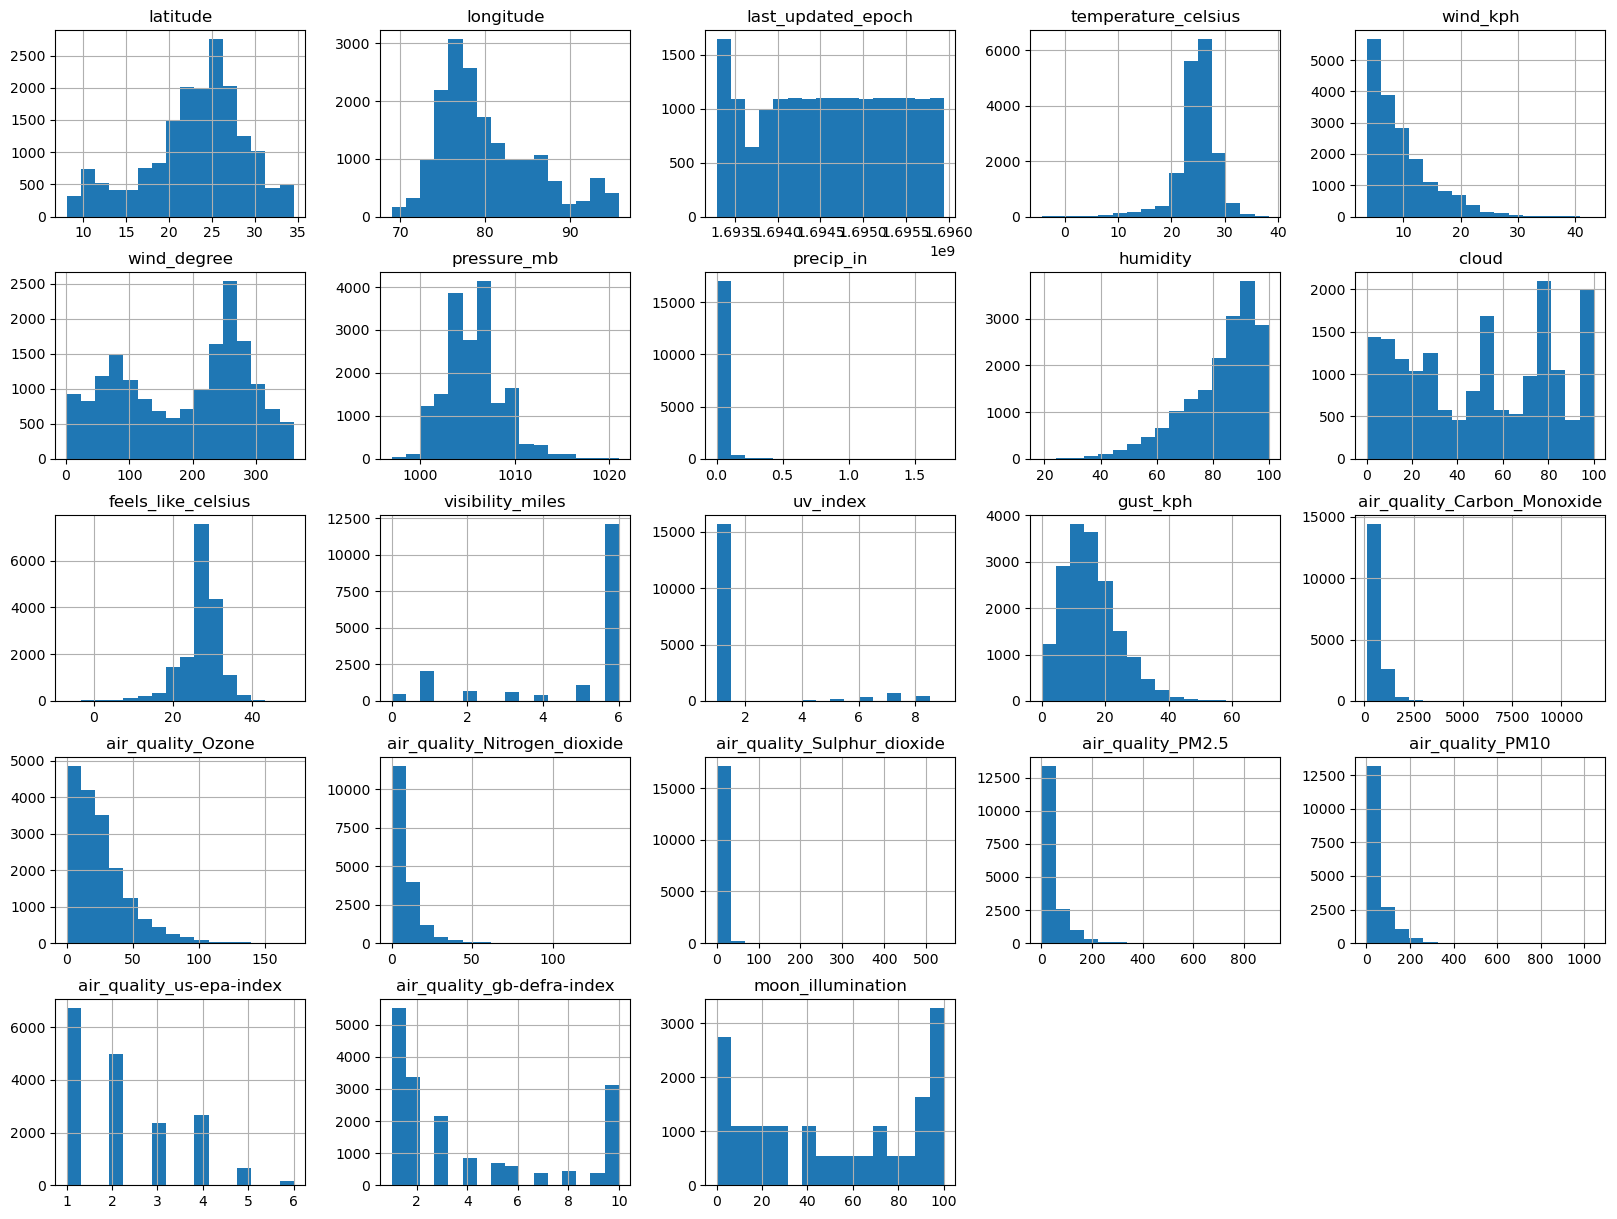

In [22]:
 df.hist(bins=16, figsize=(20,15));

#### Determining correlation between various fields_2

 A Correlation matrix is a Statistical Techinique used to Evalute the Relationship between two Variables in a data set.
The matrix  is a table in which every cell contains a correlation co-efficient.
Where 1 is Considered a Strong relationship,
      0 a neural Relationship and -1 a Not Strong Relationship.

C:\Windows\Temp\ipykernel_3044\3979400410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


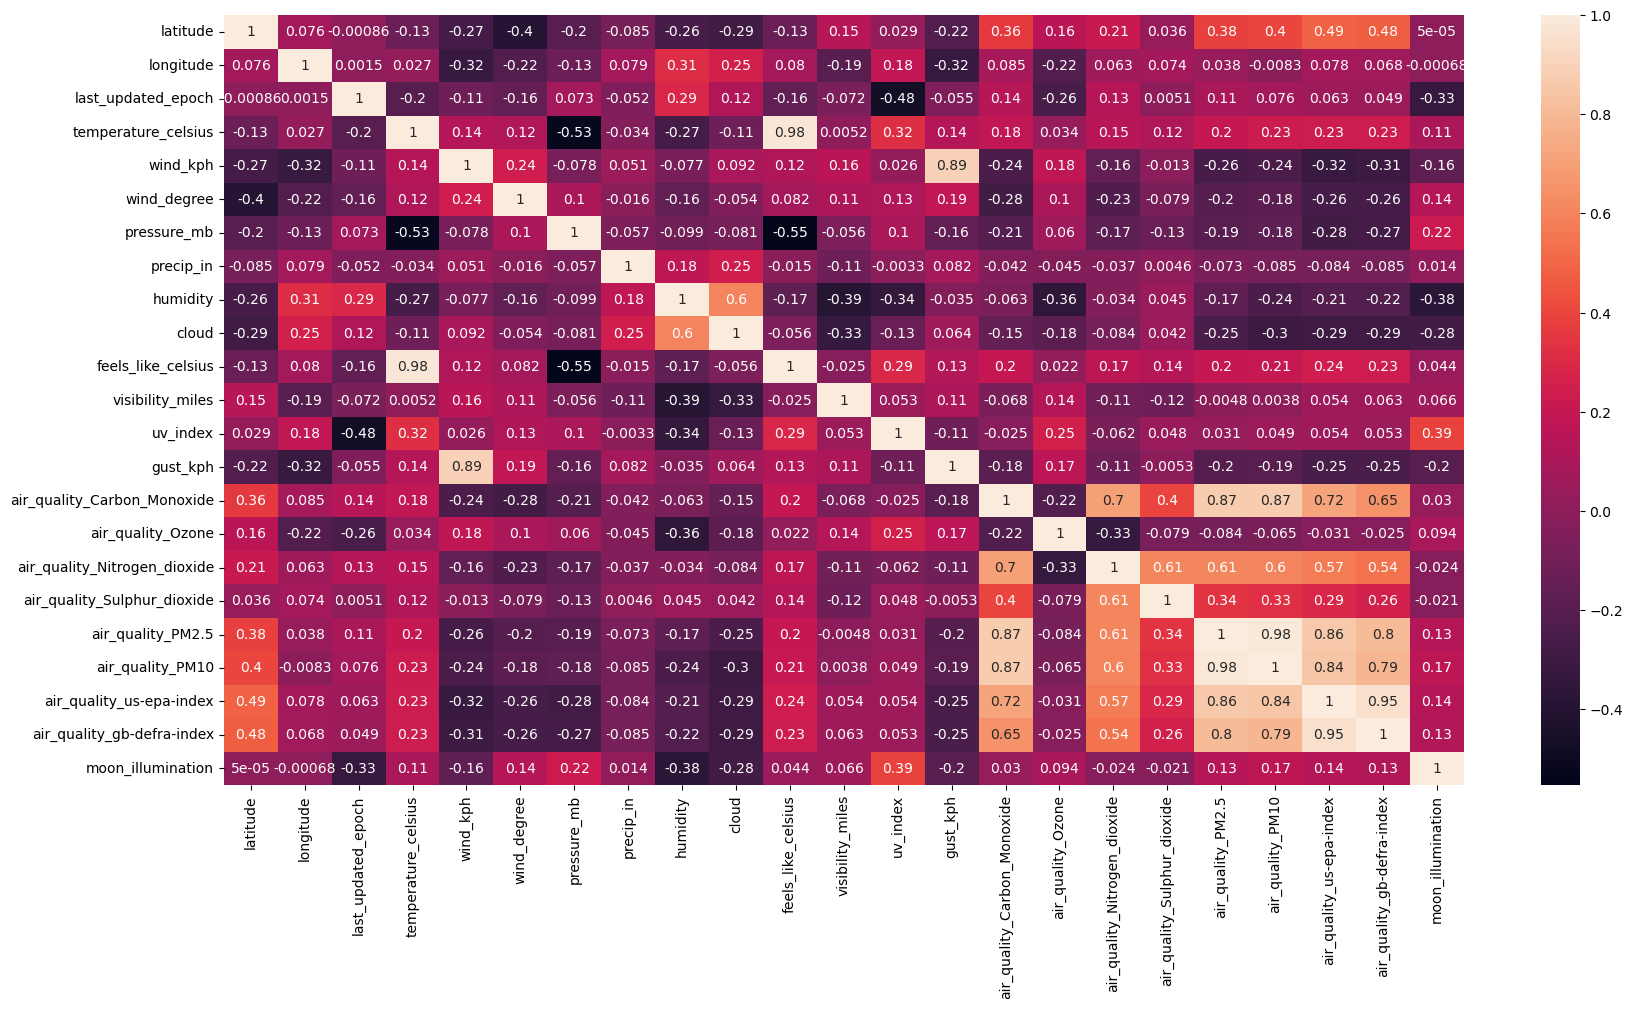

In [23]:
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True)
plt.show()

#### UV index scatterplot_5

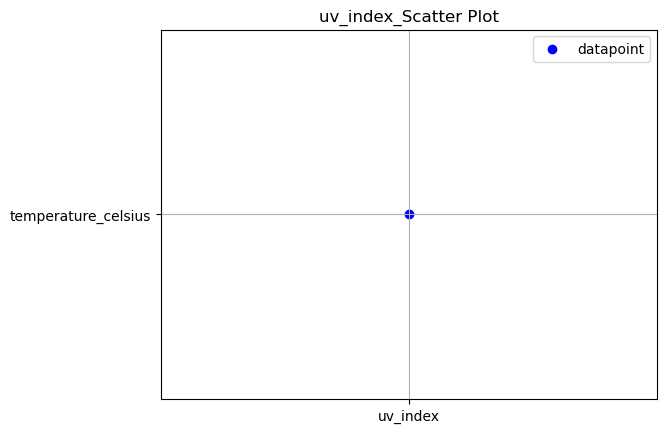

In [24]:
plt.scatter('uv_index','temperature_celsius', label='datapoint', color='blue', marker='o')
plt.title('uv_index_Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

#### Ploting Temperature vs various air quality metrices (Scaled)

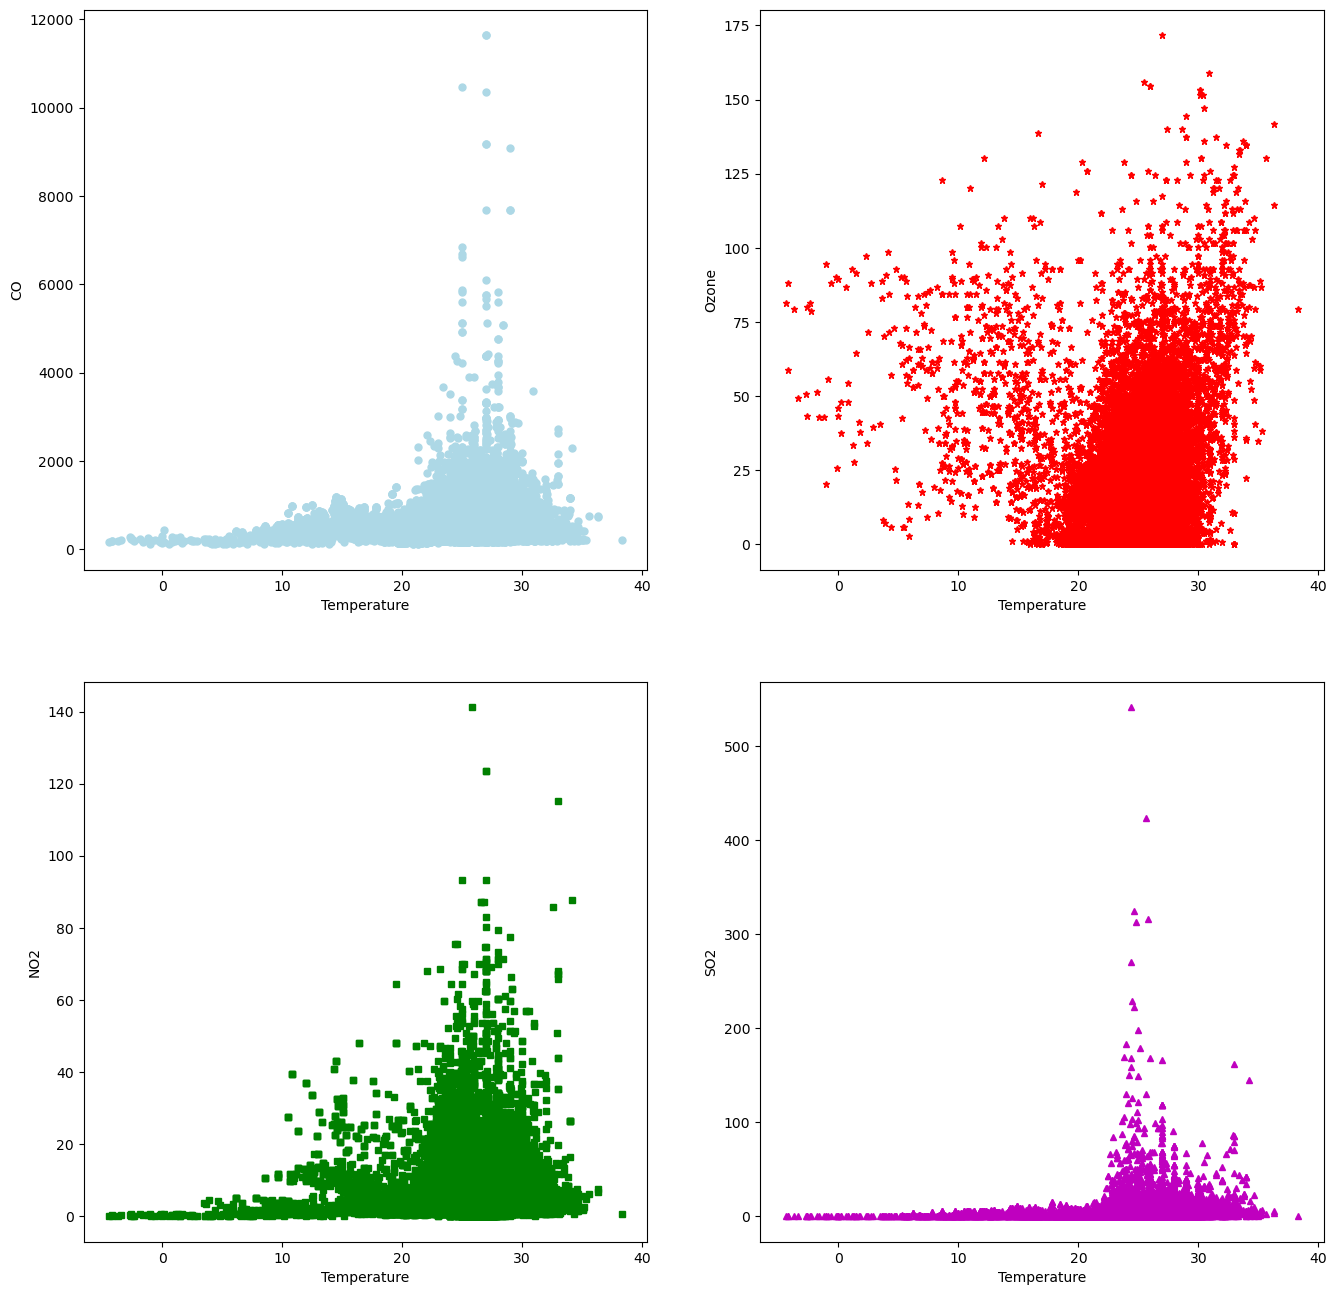

In [25]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

temp_weather=df


# Scatter Plots for Air Quality Metrics vs Temperature
air_quality_metrics = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 
                       'air_quality_Sulphur_dioxide']

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.plot( "temperature_celsius","air_quality_Carbon_Monoxide", data=temp_weather,color="lightblue",marker='o',ms="5",ls = '',label="CO")
plt.xlabel("Temperature")
plt.ylabel("CO")

plt.subplot(2, 2, 2)
plt.plot( "temperature_celsius","air_quality_Ozone", data=temp_weather,color="r",marker='*',ms="5",ls = '',label="Ozone")
plt.xlabel("Temperature")
plt.ylabel("Ozone")

plt.subplot(2, 2, 3)
plt.plot( "temperature_celsius","air_quality_Nitrogen_dioxide", data=temp_weather,color="green",marker='s',ms="5",ls = '',label="NO2")
plt.xlabel("Temperature")
plt.ylabel("NO2")

plt.subplot(2, 2, 4)
plt.plot( "temperature_celsius","air_quality_Sulphur_dioxide", data=temp_weather,color="m",marker='^',ms="5",ls = '',label="SO2")
plt.xlabel("Temperature")
plt.ylabel("SO2")

plt.show()

# Comparing various models that can be used to predict temparature

As temperature depend on various factors like latitude, longitude, wind, rain, humidity etc, we will be considering these fields only.

## taking X and Y (target )
##### X is an independent Variabale
#### Y is an vaector of target( Dependent) values, beaing the value you want to try to predict.

In [26]:
temperature_data = df['temperature_celsius']
temperature_factors = df[['latitude','longitude','wind_kph','wind_degree','pressure_mb','precip_in','humidity','cloud']]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [28]:
x=temperature_factors
y=temperature_data

## splitting the data into training and testing

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

#### shapes of splitted data

In [30]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (12257, 8)
X_test: (5254, 8)
Y_train: (12257,)
Y_test: (5254,)


# Creation of a Model

# Model 1 :Linear Regression

#### Linear Regression 
is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
ln=LinearRegression()

### Training data is used for model building

In [33]:
ln.fit(x_train,y_train)

LinearRegression()

### testing data used for prediction

In [34]:
predicted_test=ln.predict(x_test)

In [35]:
#importing linbrary for calculating accuracy
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
accuracy1=r2_score(y_test,predicted_test)

### Evaluate accuracy

In [37]:
accuracy1

0.5008804995292925

In [38]:
mean=mean_squared_error(y_test,predicted_test)

In [39]:
mean

7.2409717913795255

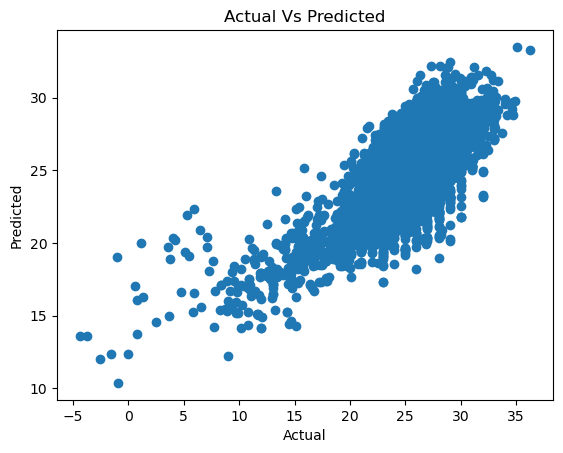

In [40]:
plt.scatter(y_test,predicted_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual Vs Predicted")
plt.show()

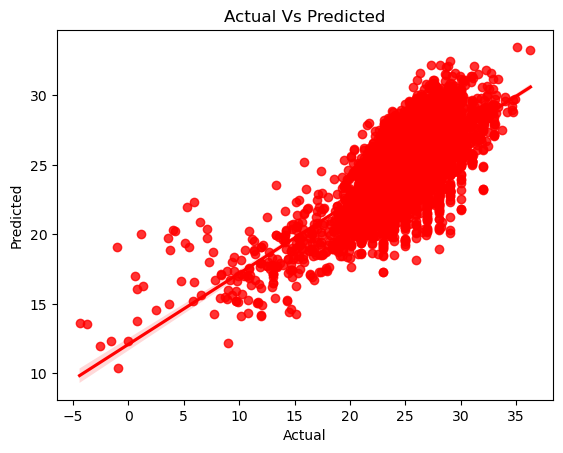

In [41]:
sns.regplot(x=y_test,y=predicted_test,color ='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual Vs Predicted")
plt.show()

#### Observation
- 51.15% of Accuracy in Linear Regression Model

#  2-RandomForestRegressor

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
rr=RandomForestRegressor(n_estimators=10,random_state=42)
rr

RandomForestRegressor(n_estimators=10, random_state=42)

### training data used for model building

In [44]:
 rr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

### testing data used for prediction

In [45]:
prd=rr.predict(x_test)

In [46]:
prd

array([24.6 , 24.04, 21.73, ..., 26.81, 21.53, 24.88])

In [47]:
mae=mean_absolute_error(y_test,prd)

r2=r2_score(y_test,prd)

In [48]:
mae

0.641170536733917

In [49]:
mse=mean_squared_error(y_test,prd)
mse

1.052822668443091

### Evaluate accuracy

In [50]:
r2

0.9274290330776942

#### Observation
- 92% of Accuracy in Random Forest Regressor Model

# Model 3: Decision Tree Based Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [53]:
dr=DecisionTreeRegressor()

In [54]:
dr

DecisionTreeRegressor()

### Training data is used for model building

In [55]:
dr.fit(x_train,y_train)

DecisionTreeRegressor()

### testing data used for prediction

In [56]:
prd1=dr.predict(x_test)

In [57]:
prd1

array([24.5, 23.4, 24.1, ..., 14.2, 26.1, 27.1])

In [58]:
from sklearn import metrics
accu=r2_score(y_test,prd1)*100

### Evaluate accuracy

In [59]:
accu

88.64626989315818

### Observation
- 88% of Accuracy in Decision Tree Regressor Model

# 4 KNN

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [62]:
bk=None
ba=0

In [63]:
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    sc = cross_val_score(knn, x_train, y_train, cv=5 , scoring = "r2")
    m_a = np.mean(sc)
    print(m_a)

    if m_a > ba:
        ba = m_a
        bk = k

0.6721731022731886
0.6922534208568012
0.684727178143183
0.677703850025617
0.6675528541300848
0.6591091148920325
0.6479900064560306
0.6359351824184993
0.6233994309628764
0.6125708112855939


In [64]:
bk,ba

(2, 0.6922534208568012)

In [65]:
knn = KNeighborsRegressor(n_neighbors=10)

### Training dsata used for building model

In [66]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

### testing data used for prediction

In [67]:
prd3 = knn.predict(x_test)

In [68]:
prd3

array([22.67, 24.31, 22.89, ..., 26.64, 22.89, 24.68])

### Evaluate accuracy

In [69]:
accuknn=r2_score(y_test,prd3)

In [70]:
accuknn

0.631551519309941

### Observation
- 63% of Accuracy in KNN Regressor Model

# 5 Extra tree regressor

ETR cames from random split of the data and its a learning techinque that aggregates the results of different de co-rrelated decision tree similar to Random Forest Regressor.
EXTREE Tree can often achive a good or Better Performance then the Random Forest.
in simple words, takes a random subset of data without replacement.thus nodes  are split on random splits and not on best split.


In [71]:
from sklearn.ensemble import  ExtraTreesRegressor

### Training data used for biulding the model & Testing data used for predicting

In [72]:
ET_Model=ExtraTreesRegressor(n_estimators = 100)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


### Evaluate accuracy

In [73]:
score_etr=round(r2_score(y_test,y_predict)*100,2)
score_etr

94.24

# Observation
- 94% of Accuracy in Extra Tree Regressor Model

In [74]:
Model_results = pd.DataFrame({
    'Model': [ 'Linear Regression', 
              'Random Forest Regressor', 
              'Decision Tree Regressor' ,
              'knn',
              'Extra tree regressor'
              ],
    'Score': [ accuracy1, 
               r2,
              accu,
             accuknn,
             score_etr]
           })
Model_results = Model_results.sort_values(by='Score', ascending=False)
Model_results = Model_results.reset_index(drop=False)
Model_results.head()

,index,Model,Score
0,4,Extra tree regressor,94.240000
1,2,Decision Tree Regressor,88.646270
2,1,Random Forest Regressor,0.927429
3,3,knn,0.631552
4,0,Linear Regression,0.500880


In [75]:
Model_results

,index,Model,Score
0,4,Extra tree regressor,94.240000
1,2,Decision Tree Regressor,88.646270
2,1,Random Forest Regressor,0.927429
3,3,knn,0.631552
4,0,Linear Regression,0.500880


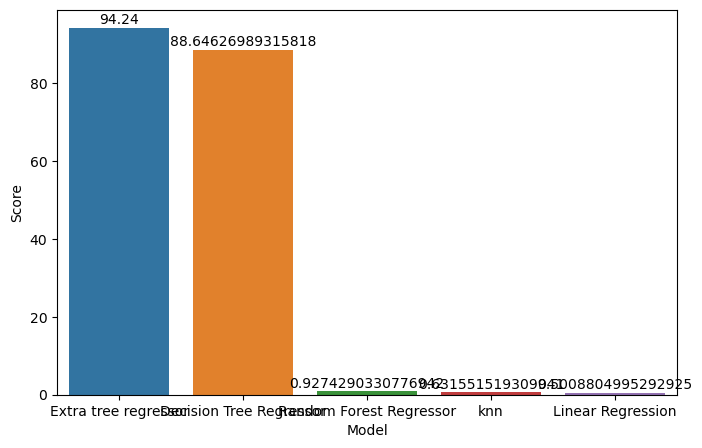

In [76]:
plt.subplots(figsize=(8,5))
ax=sns.barplot(x='Model',y="Score",data=Model_results)
labels = (Model_results["Score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 10, color = 'black')

In [77]:
df.to_csv("data_Tableau.csv")

In [78]:
x_train.head(1)

,latitude,longitude,wind_kph,wind_degree,pressure_mb,precip_in,humidity,cloud
13697,24.48,74.87,11.2,255,1006.0,0.0,94,39


In [79]:
y_train.head(1)

13697    22.7
Name: temperature_celsius, dtype: float64

In [90]:
latitude = int(input("Enter latitude : "))
longitude = int(input("Enter longitude : "))
wind_kph = int(input("Enter wind_kph : "))
wind_degree = int(input("Enter wind_degree : "))
pressure_mb = int(input("Enter pressure_mb : "))
precip_in  = int(input("Enter precip_in : "))
humidity = int(input("Enter humidity : "))
cloud = int(input("Enter cloud : "))

Enter latitude : 24
Enter longitude : 74
Enter wind_kph : 11
Enter wind_degree : 255
Enter pressure_mb : 1006
Enter precip_in : 0
Enter humidity : 94
Enter cloud : 39


In [ ]:
---